<a href="https://colab.research.google.com/github/wang2700/ECE637/blob/master/DL_Lab_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 637 Deep Learning Lab Exercises


Name: *Your name*

# Section 1

## Exercise 1.1

1.   Create two lists, `A` and `B`: `A` contains 3 arbitrary numbers and `B` contains 3 arbitrary strings.
2.   Concatenate two lists into a bigger list and name that list `C`. 
3.   Print the first element in `C`.
4.   Print the second last element in `C` via negative indexing.
5.   Remove the second element of `A` from `C`.
6.   Print `C` again.

In [ ]:
A = [3, 20, 56]
B = ['meeqi', 'pfmzj', 'eaxhh']
C = A + B
print(C[0])
print(C[-2])
C.remove(C[1])
print(C)


3
pfmzj
[3, 56, 'meeqi', 'pfmzj', 'eaxhh']


## Exercise 1.2
In this exercise, you will use a low-pass IIR filter to remove noise from a sine-wave signal.

You should organize your plots in a 3x1 subplot format.

1. Generate a discrete-time signal, `x`, by sampling a 2Hz continuous time sine wave signal with peak amplitude 1 from time 0s to 10s and at a sampling frequency of 500 Hz. Display the signal, `x`, from time 4s to 6s in the first row of a 3x1 subplot with the title "original signal".

2. Add Gaussian white random noise with 0 mean and standard deviation  0.1 to `x` and call it `x_n` . Display `x_n` from 4s to 6s on the second row of the subplot with the title "input signal".

3. Design a low-pass butterworth IIR filter of order 5 with a cut-off frequency of 4Hz, designed to filter out the noise.  Hint: Use the [signal.butter](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function and note that the frequencies are relative to the Nyquist frequency. Apply the IIR filter to `x_n`, and name the output `y`. Hint: Use [signal.filtfilt](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt) function. Plot `y` from 4s to 6s on the third row of the subplot with the title "filtered signal".


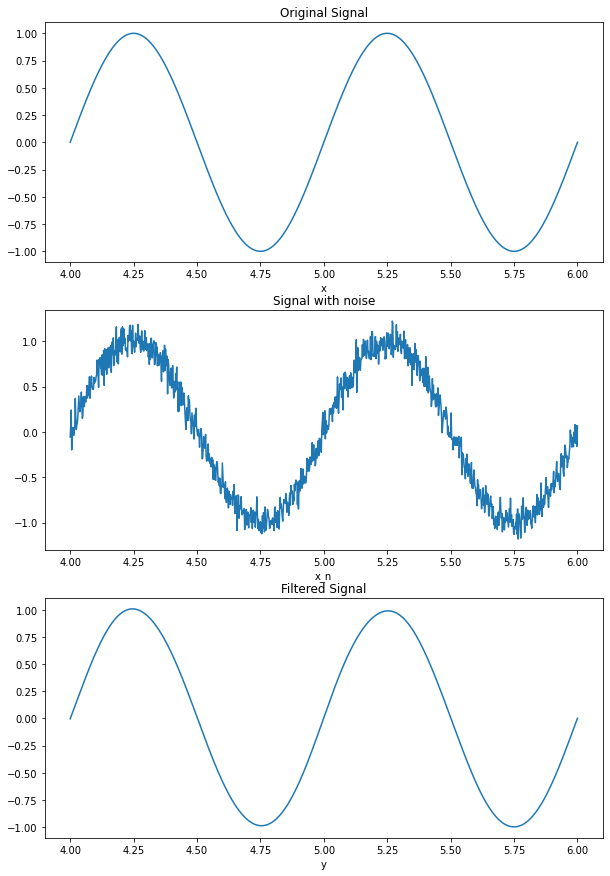

In [ ]:
import numpy as np                     # import the numpy packages and use a shorter alising name
import matplotlib.pyplot as plt        # again import the matplotlib's pyplot packages
from scipy import signal               # import a minor package signal from scipy
plt.figure(figsize=(10, 15))           # fix the plot size

# part 1
fs = 500
f = 2
t = np.arange(start=0, stop=10, step=1./fs)
x = np.sin(2 * np.pi * t)
plot_range = np.where(np.logical_and(t >= 4, t<= 6))[0]
plt.subplot(311)
plt.plot(t[plot_range], x[plot_range])
plt.title('Original Signal')
plt.xlabel('x')

# part 2
x_n = np.random.normal(scale=0.1, size=len(x)) + x
plt.subplot(312)
plt.plot(t[plot_range], x_n[plot_range])
plt.title('Signal with noise')
plt.xlabel('x_n')

# part 3
b, a = signal.butter(5, 4./(fs / 2))
y = signal.filtfilt(b, a, x_n)
plt.subplot(313)
plt.plot(t[plot_range], y[plot_range])
plt.title('Filtered Signal')
plt.xlabel('y')

plt.show()

# Section 2

## Exercise 2.1

*   Plot the third image in the test data set
*   Find the correspoding label for the this image and make it the title of the figure


11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Label: 1')

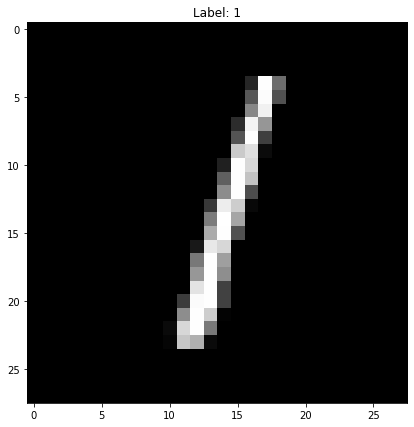

In [ ]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

plt.figure(figsize=(7,7))
# print(test_images[2])
plt.imshow(test_images[2].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Label: ' + str(test_labels[2]))


## Exercise 2.2
It is usually helpful to have an accuracy plot as well as a loss value plot to get an intuitive sense of how effectively the model is being trained. 

* Add code to this example for plotting two graphs with the following requirements:
  - Use a 1x2 subplot with the left subplot showing the loss function and right subplot showing the accuracy.
  - For each graph, plot the value with respect to epochs. Clearly label the x-axis, y-axis and the title.

(Hint: The value of of loss and accuracy are stored in the `hist` variable. 
Try to print out `hist.history` and `his.history.keys()`.)

In [ ]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.4365 - accuracy: 0.8734
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9665
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0472 -

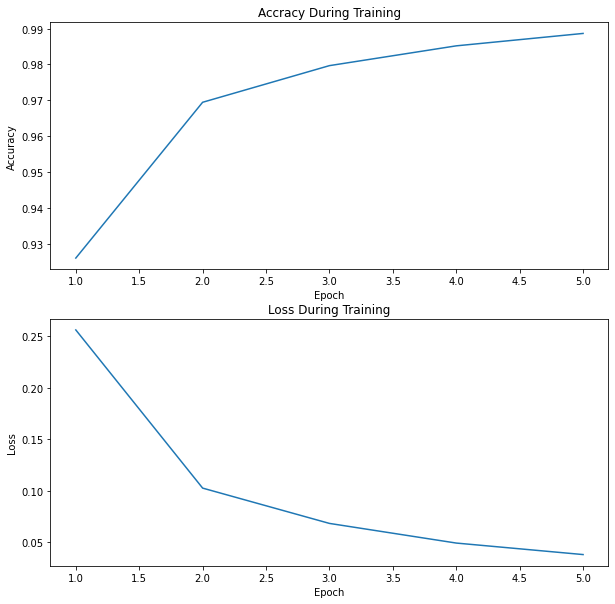

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(np.arange(1,6), hist.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accracy During Training')

plt.subplot(212)
plt.plot(np.arange(1,6), hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')

plt.show()

## Exercise 2.3
Use the dense network from Section 2 as the basis to construct of a deeper network with

*  5 dense hidden layers with dimensions [512, 256, 128, 64, 32] each of which uses a ReLU non-linearity

**Question:** Will the accuracy on the testing data always get better if we keep making the neural network larger?



*Your answer*

In [ ]:
import keras
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28,28,1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5764 - accuracy: 0.8147
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1085 - accuracy: 0.9670
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0739 - accuracy: 0.9779
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9773
test_accuracy: 0.9772999882698059


# Section 3

## Exercise 3.1
In this exercise, you will access the relationship between the feature extraction layer and classification layer. The example above uses two sets of convolutional layers and pooling layers in the feature extraction layer and two dense layers in the classification layers. The overall performance is around 98% for both training and test dataset. In this exercise, try to create a similar CNN network with the following requirements:

*   Achieve the overall accuracy higher than 99% for training and testing dataset.
*  Keep the total number of parameters used in the network lower than 100,000.

In [ ]:
import keras
from keras import models
from keras import layers

network = models.Sequential()
# ---- Feature extraction section
# First Layer
network.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second Layer
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

# Second Layer
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

# ---- Classification section
# Rearrange the data
network.add(layers.Flatten())
# Third Layer
network.add(layers.Dense(64, activation='relu'))
# Fourth Layer
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5384 - accuracy: 0.8210
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0596 - accuracy: 0.9818
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0400 - accuracy: 0.9876
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9901
test_accuracy: 0.9901000261306763


# Section 4

## Exercise 4.1
In this exercise you will need to create the entire neural network that does image denoising tasks. Try to mimic the code provided above and follow the structure as provided in the instructions below.

**Task 1**: Create the datasets
1.   Import necessary packages
2.   Load the MNIST data from Keras, and save the training dataset images as `train_images`, save the test dataset images as `test_images`
3.   Add additive white gaussian noise to the train images as well as the test images and save the noisy images to `train_images_noisy` and `test_images_noisy` respectivly. The noise should have mean value 0, and standard deviation 0.4. (Hint: Use [np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html))
4.   Show the first image in the training dataset as well as the test dataset (plot the images in 1 x 2 subplot form)

Text(0.5, 1.0, 'First Test Image (Label: 7)')

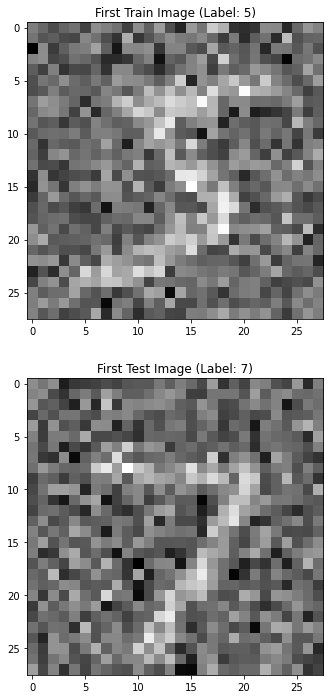

In [19]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images_nor = train_images.astype('float32') / 255
train_images_nor = train_images_nor.reshape((60000, 28, 28, 1))

test_images_nor = test_images.astype('float32') / 255
test_images_nor = test_images_nor.reshape((10000, 28, 28, 1))


train_images_noisy = train_images_nor + np.random.normal(scale=0.4, size=train_images_nor.shape)
test_images_noisy = test_images_nor + np.random.normal(scale=0.4, size=test_images_nor.shape)

plt.figure(figsize=(6, 12))
plt.subplot(211)
plt.imshow(train_images_noisy[0].reshape((28,28))*255, cmap=plt.cm.gray)
plt.title('First Train Image (Label: ' + str(train_labels[0]) + ')')

plt.subplot(212)
plt.imshow(test_images_noisy[0].reshape((28,28))*255, cmap=plt.cm.gray)
plt.title('First Test Image (Label: ' + str(test_labels[0]) + ')')


**Task 2**: Create the neural network model
1.   Create a sequential model called `encoder` with the following layers sequentially:
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function and name the layer as `'convOutput'`.
  * flatten layer
  * dense layer with output dimension as `encoding_dim`  with `'relu'` activition function.
2.   Create a sequential model called `decoder` with the following layers sequentially:
  * dense layer with the input dimension as `encoding_dim` and the output dimension as the product of the output dimenstions of the `'convOutput'` layer.
  * reshape layer that convert the tensor into the same shape as `'convOutput'`
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function
  * convolutional layer with `1` output channels, `3x3` kernel size, and the padding convention `'same'` with `'sigmoid'` activition function
3. Create a sequential model called `autoencoder` with the following layers sequentially:
  * `encoder` model
  * `decoder` model
 

In [23]:
encoding_dim = 32
input_dim = train_images_noisy.shape[1:]
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(28,28,1)))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(8, (3, 3),padding='same', activation='relu', name='convOutput'))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(encoding_dim, activation='relu'))

decoder = models.Sequential()
decoder.add(layers.Dense(np.prod(encoder.get_layer('convOutput').output_shape[1:]), activation='relu', input_shape=(encoding_dim,)))
decoder.add(layers.Reshape(encoder.get_layer('convOutput').output_shape[1:]))
decoder.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu'))
decoder.add(layers.UpSampling2D())
decoder.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
decoder.add(layers.UpSampling2D())
decoder.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
decoder.add(layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid'))

autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [24]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
convOutput (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)              

**Task 3**: Create the neural network model  

Fit the model to the training data using the following hyper-parameters:
  * `adam` optimizer
  * `binary_crossentropy` loss function
  * `20` training epochs
  * batch size as `256`
  * set `shuffle` as `True`
  
Compile the model and fit ...

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images_noisy, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)

Epoch 1/20
235/235 [==============================] - 4s 14ms/step - loss: 0.3546
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1852
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1429
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1329
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1276
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1240
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1205
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1184
Epoch 9/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1167
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1152
Epoch 11/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1142
Epoch 12/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1136
Epoch 13/20
2

**Task 4**: Create the neural network model (No need to write code, just run the following commands)

In [26]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

  numCols = 3 if groundTruth is None else 4
  
  num_images = input_imgs.shape[0]
      
  encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

  plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, num_images*size))

  pltIdx = 0
  col = 0
  for i in range(0, num_images):

    col += 1
    # plot input image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(input_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Input Image')

    # plot encoding
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(encoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Encoded Image')

    # plot reconstructed image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(output_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Reconstructed Image')
  
    if numCols == 4:
      # plot ground truth image
      pltIdx += 1
      ax = plt.subplot(num_images, numCols, pltIdx)
      plt.imshow(groundTruth[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      
      if col == 1:
        plt.title('Ground Truth')

  plt.show()

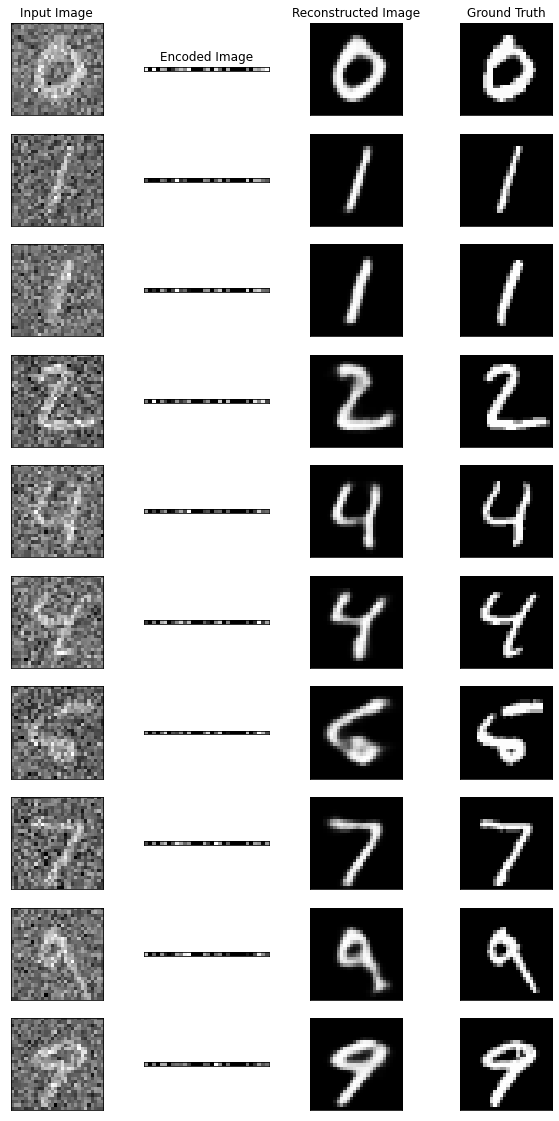

In [27]:
num_images = 10

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images_noisy[I]

encoded_imgs = encoder.predict(test_images_noisy[I])
output_imgs = decoder.predict(encoded_imgs)

showImages(input_imgs, encoded_imgs, output_imgs, size=2, groundTruth=test_images_nor[I])